# Kholkine Method

In [1]:
import pickle

with open('resultslist.pickle', 'rb') as f:
    results = pickle.load(f)
    
with open('dates.pickle', 'rb') as f:
    dates = pickle.load(f)    

In [2]:
import dateutil.parser

def catch(date):
    try:
        return dateutil.parser.parse(date)
    except Exception as e:
        print(e)
        return 'Date'

formatted_dates = [catch(date) for date in dates]

Unknown string format: Date
Unknown string format: Date
Unknown string format: Date
Unknown string format: Date
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
1 SAGAN Peter Sport Vlaanderen - Baloise
2 KÜNG Stefan BMC Racing Team
3 SAGAN Peter BMC Racing Team
4 SAGAN Peter BMC Racing Team
5 SAGAN Peter Quick-Step Floors
6 SAGAN Peter Lotto Soudal
7 SAGAN Peter Trek - Segafredo
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
1 VAN VLEUTEN Annemiek MACKAIJ Floortje Canyon//SRAM Racing
2 VAN DIJK Ellen VAN GOGH Natalie MACKAIJ Floortje Canyon//SRAM Racing
3 VAN DIJK Ellen VAN GOGH Natalie SWINKELS Karlijn Canyon//SRAM Racing
4 BRENNAUER Lisa VAN GOGH Natalie SWINKELS Karlijn Canyon//SRAM Racing
5 VAN VLEUTEN Annemiek KOSTER Anouska DE JONG Demi Boels - Dolmans Cycling Team
6 BRENNAUER Lisa RYAN Alexis DE JONG Demi Boels - Dolmans Cycling Team
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Tea

Unknown string format: Date
Unknown string format: Date
Unknown string format: Date
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
1 SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina ATOM Deweloper Posciellux.pl Wrocław
2 RISSVEDS Jenny SCHREMPF Carina Sweden
3a SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina Sweden
3b SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina Sweden
4 SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina Sweden
Unknown string format: Date


In [3]:
import pandas as pd

race_clusters = pd.read_csv('clustersNOV2023.csv')

old_clusters = pd.read_csv('clustered_races.csv')

race_clusters = old_clusters.merge(race_clusters, left_on = 'name2', right_on = 'Race Name', how = 'left')

In [4]:
race_clusters

,Unnamed: 0,name2,cluster_labels,Race Name,Constrained,KmeansClust
0,0,2017 4 Jours de Dunkerque,3,2017 4 Jours de Dunkerque,1.0,3.0
1,1,2017 99a Coppa Bernocchi - 42o GP BPM,5,2017 99a Coppa Bernocchi - 42o GP BPM,2.0,2.0
2,2,2017 Abu Dhabi Tour Stage 1,3,2017 Abu Dhabi Tour Stage 1,1.0,7.0
3,3,2017 Abu Dhabi Tour Stage 2,0,2017 Abu Dhabi Tour Stage 2,4.0,3.0
4,4,2017 Abu Dhabi Tour Stage 3,5,2017 Abu Dhabi Tour Stage 3,0.0,4.0
...,...,...,...,...,...,...
6238,6238,2022 ZLM Tour Stage 1,1,2022 ZLM Tour Stage 1,5.0,3.0
6239,6239,2022 ZLM Tour Stage 2,6,2022 ZLM Tour Stage 2,1.0,3.0
6240,6240,2022 ZLM Tour Stage 3,6,2022 ZLM Tour Stage 3,1.0,5.0
6241,6241,2022 ZLM Tour Stage 4,3,2022 ZLM Tour Stage 4,1.0,7.0


In [5]:
def name_adjustment(test_df):
    try:
        test_df['Team'] = np.where(test_df['Team'].isna(), '', test_df['Team'])
        test_df['ActualName'] = [a.replace(b, '').strip() for a, b in zip(test_df['Rider'], test_df['Team'])]
        return(test_df)
    except:
        try:
            test_df['ActualName'] =test_df['Team']
            test_df['Time'] = np.where(test_df['Time'].isna(), test_df['Time'],  test_df['Team']) 
            test_df['Team'] = test_df['Time'].fillna(method="pad")
            test_df['Pos.'] = test_df['Pos.'].fillna(method="pad")
            test_df = test_df[test_df['Time'].isna()]
            return(test_df)
        except:
            return('Bad DataFrame')

In [6]:
import pandas as pd

rider_results_df = pd.read_csv('TussentijdseResultsPerRennerTable.csv')

In [7]:
import numpy as np
import re

wt_races = rider_results_df['Race'][rider_results_df['Race'].str.contains('.WT', na=False)&(-rider_results_df['Race'].str.contains('.WWT', na=False))].unique()

wt_races = [re.sub(r' \([^)]*\)', '', text) for text in wt_races]
wt_races = [re.sub(' \d{3}k', '', text) for text in wt_races]
wt_races = [re.sub(' \d{2}k', '', text) for text in wt_races]
wt_races = list(set(wt_races))

In [8]:
wwt_races = rider_results_df['Race'][rider_results_df['Race'].str.contains('.WWT', na=False)].unique()

wwt_races = [re.sub(r' \([^)]*\)', '', text) for text in wwt_races]
wwt_races = [re.sub(' \d{3}k', '', text) for text in wwt_races]
wwt_races = [re.sub(' \d{2}k', '', text) for text in wwt_races]
wwt_races = list(set(wwt_races))

In [9]:
pattern = '|'.join(wt_races)
pattern = pattern+'|Gent-Wevelgem in Flanders Fields|Daup|Wallonne|Liege'
is_wt_race = race_clusters['Race Name'].str.contains(pattern)

pattern = '|'.join(wwt_races)
pattern = pattern+'|Feminine|Femmes'
is_wwt_race = race_clusters['Race Name'].str.contains(pattern)

In [10]:
is_wt_race = np.where(is_wwt_race, False, is_wt_race)

In [11]:
# Only keep WT races
test_index = [index for index, date in enumerate(formatted_dates) if (type(date)!=str and date.year == 2022)] 
train_index = [index for index, date in enumerate(formatted_dates) if (type(date)!=str and date.year != 2022)] 

test_index = list(set.intersection(set(np.flatnonzero(is_wt_race)), (test_index)))
train_index = list(set.intersection(set(np.flatnonzero(is_wt_race)), (train_index))) #drop this when training our own method

train_dates = [formatted_dates[i] for i in train_index]
test_dates = [formatted_dates[i] for i in test_index]

train_results = [results[i] for i in train_index]
test_results = [results[i] for i in test_index]

test_clus = race_clusters.iloc[test_index,]
train_clus = race_clusters.iloc[train_index,]

train_clus = train_clus.reset_index()
test_clus = test_clus.reset_index()

birth_dates = pd.read_csv('BirthDates.csv')

import numpy as np
import datetime
from itertools import compress

def name_adjustment(test_df):
    try:
        test_df['Team'] = np.where(test_df['Team'].isna(), '', test_df['Team'])
        test_df['ActualName'] = [a.replace(b, '').strip() for a, b in zip(test_df['Rider'], test_df['Team'])]
        return(test_df)
    except:
        try:
            test_df['ActualName'] =test_df['Team']
            test_df['Time'] = np.where(test_df['Time'].isna(), test_df['Time'],  test_df['Team']) 
            test_df['Team'] = test_df['Time'].fillna(method="pad")
            test_df['Pos.'] = test_df['Pos.'].fillna(method="pad")
            test_df = test_df[test_df['Time'].isna()]
            return(test_df)
        except:
            return('Bad DataFrame')
        
for i in range(len(test_results)):
    test_results[i]['Date'] = test_dates[i]
    test_results[i]['Cluster'] = test_clus.loc[i,'KmeansClust']        

for i in range(len(train_results)):
    train_results[i]['Date'] = train_dates[i]
    train_results[i]['Cluster'] = train_clus.loc[i,'KmeansClust']   

train_results = [name_adjustment(df) for df in train_results]
test_results = [name_adjustment(df) for df in test_results]    

single_races = rider_results_df[-rider_results_df['Distance'].isnull()]

adjusted_dates = []

for i in single_races.index:
    adjusted_dates.append(str(single_races['Date'][i])+'.'+str(single_races['year'][i]))
    
single_races['date_adjusted'] = [catch(date) for date in adjusted_dates]
single_correct_dates = single_races[single_races['date_adjusted']!='Date']
single_correct_dates['day_month'] = single_correct_dates['Date'].str.split('.')
single_correct_dates['final_date'] = [datetime.date(year=int(x[1].year), month=int(x[1].day_month[1]), day=int(x[1].day_month[0])) for x in single_correct_dates.iterrows()]

eerste_probeersel_start_carriere = single_correct_dates.groupby(['rider'])['final_date'].min().reset_index()
eerste_probeersel_start_carriere.columns = ['rider', 'FirstRaceAsProfessional']

def merge_date_info(df):
    try:
        new_df = pd.merge(df, eerste_probeersel_start_carriere, left_on='ActualName', right_on='rider').drop('rider', axis=1)
        try: 
            new_df=new_df.drop('Rider', axis=1)
        except:
            print('No Rider Column')
        new_df = pd.merge(new_df, birth_dates, left_on='ActualName', right_on='Rider').drop('Rider', axis=1)
        new_df['BirthDate'] = np.where(new_df['BirthDate']=='No Date Found', np.nan, new_df['BirthDate'])
        #new_df['Age'] = (pd.to_datetime(new_df['Date']) - pd.to_datetime(new_df['BirthDate'])).dt.days
        try:
            new_df['CareerLength'] = (pd.to_datetime(new_df['Date']) - pd.to_datetime(new_df['FirstRaceAsProfessional'])).dt.days/365
            return(new_df)
        except:
            print('Problem')
            print(new_df)
    except:
        print(df)
        
train_results2 = [merge_date_info(df) for df in train_results]
test_results2 = [merge_date_info(df) for df in test_results]  

rider_results_df['Date'] = rider_results_df['Date'].fillna(method='ffill')
rider_results_df['filled_date'] = np.where(rider_results_df['Date'].str.contains('»'), rider_results_df['Date'].str.split('»').str[1], rider_results_df['Date'])

adjusted_dates = []

for i in rider_results_df.index:
    adjusted_dates.append(str(rider_results_df['filled_date'][i])+'.'+str(rider_results_df['year'][i]))
    
rider_results_df['date_adjusted'] = [catch(date) for date in adjusted_dates] 

points_scored = rider_results_df[-rider_results_df['PointsPCS'].isna()]

points_scored = points_scored[points_scored['date_adjusted']!='Date']
points_scored['day_month'] = points_scored['filled_date'].str.split('.')
points_scored['final_date'] = [datetime.date(year=int(x[1].year), month=int(x[1].day_month[1]), day=int(x[1].day_month[0])) for x in points_scored.iterrows()]

stacker = []

for i in range(len(train_results2)):
    df = train_results2[i]
    stacker.append(df)
    
for i in range(len(test_results2)):
    df = test_results2[i]
    stacker.append(df)
    
unique_ids_wt = pd.concat(stacker)['ActualName'].unique()
points_scored = points_scored[points_scored['rider'].isin(unique_ids_wt)]

for i in range(len(train_results2)):
    race_name = train_clus.loc[i,'Race Name']
    train_results2[i]['RaceName'] = race_name
    
for i in range(len(test_results2)):
    race_name = test_clus.loc[i,'Race Name']
    test_results2[i]['RaceName'] = race_name 
    
mylist = ['Giovanni', 'Femminile', 'Women', 'Saitama', 'Shanghai', 'Towards Zero', 'Juniors', 'Espoirs']
pattern = '|'.join(mylist)

boolean = -train_clus['Race Name'].str.contains(pattern)
train_results2 = list(compress(train_results2, boolean))
train_clus = train_clus[boolean]

print(len(train_results2))
print(train_clus.shape)

boolean = -test_clus['Race Name'].str.contains(pattern)
test_results2 = list(compress(test_results2, boolean))
test_clus = test_clus[boolean]  

from datetime import timedelta

def form_function(rider, race_date):
    rider_form_points = points_scored[(points_scored['rider']==rider) & (points_scored['final_date']<race_date) & (points_scored['final_date']>=(race_date- timedelta(days=42)))]
    return(np.sum(rider_form_points['PointsPCS']))

def calculate_form(df):
    try:
        df['form'] = [form_function(x[1].ActualName, x[1].Date) for x in df.iterrows()]
    except:
        print(df)
    return(df)

train_results3 = [calculate_form(df) for df in train_results2]
test_results3 = [calculate_form(df) for df in test_results2]

points_scored = points_scored[-points_scored['Race'].isna()]

def past_results_function(rider, year, race):
    rider_form_points = points_scored[(points_scored['rider']==rider) & (points_scored['year']<year) & points_scored['Race'].str.contains(race)]
    best_result = rider_form_points['Result'].min()
    best_results = rider_form_points[rider_form_points['Result']==best_result]
    time_since = year - rider_form_points['year'].max()
    return(best_result, time_since)

def best_result_race(df):
    df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
    df['year'] = df['Date'].dt.year
    try:
        df['best_result'], df['time_since_best_result'] = zip(*[past_results_function(x[1].ActualName, x[1].year, x[1].applicable_results) for x in df.iterrows()])
    except:
        print(df)
    return(df)


train_results3 = [best_result_race(df) for df in train_results3]
test_results3 = [best_result_race(df) for df in test_results3]

lookup_df_train = pd.concat(train_results3)
lookup_df_test = pd.concat(test_results3)

lookup_df = pd.concat([lookup_df_train, lookup_df_test])
lookup_df = lookup_df.reset_index()

def past_results_function2(rider, date, race):
    rider_form_points = lookup_df[(lookup_df['ActualName']==rider) & (lookup_df['Date']<date) & (lookup_df['applicable_results']==race)]
    year = date.year
    rider_form_points = rider_form_points[-rider_form_points['Rnk'].isna()]
    rider_form_points = rider_form_points[rider_form_points['Rnk']!='DNF']
    rider_form_points = rider_form_points[rider_form_points['Rnk']!='DNS']
    rider_form_points = rider_form_points[rider_form_points['Rnk']!='OTL']    
    rider_form_points = rider_form_points[rider_form_points['Rnk']!='DSQ']
    rider_form_points = rider_form_points[rider_form_points['Rnk']!='DF']
    best_result = rider_form_points['Rnk'].astype(int).min()
    best_results = rider_form_points[rider_form_points['Rnk']==best_result]
    time_since = year - rider_form_points['year'].max()
    return(best_result, time_since)


def best_result_race_backup(df):
    try:
        df['best_result2'], df['time_since_best_result2'] = zip(*[past_results_function2(x[1].ActualName, x[1].Date, x[1].applicable_results) for x in df.iterrows()])
    except:
        print(df)
    return(df)


train_results3 = [best_result_race_backup(df) for df in train_results3]
test_results3 = [best_result_race_backup(df) for df in test_results3]

def keep_most_believable_result(df, column):
    if str(column)+str('2') in df.columns:
        df[column] = np.where(df[column].isna(), df[str(column)+str('2')], df[column])
        df = df.drop(str(column)+str('2'), axis=1)
    else:
        print(df)
    return(df)

train_results3 = [keep_most_believable_result(df, 'time_since_best_result') for df in train_results3]
test_results3 = [keep_most_believable_result(df, 'time_since_best_result') for df in test_results3]

train_results3 = [keep_most_believable_result(df, 'best_result') for df in train_results3]
test_results3 = [keep_most_believable_result(df, 'best_result') for df in test_results3]

Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2023
Unknown string format: nan.2009
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2009
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: nan.2008
Unknown string format: 04.06 » 11.06.2023
Unknown string format: nan.200

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_races['date_adjusted'] = [catch(date) for date in adjusted_dates]
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_correct_dates['day_month'] = single_correct_dates['Date'].str.split('.')
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:63: SettingWithCopyWarning: 
A value is trying to be set on a

No Rider Column
No Rider Column
No Rider Column
No Rider Column
No Rider Column
No Rider Column
No Rider Column
No Rider Column
No Rider Column
No Rider Column
619
(619, 7)


C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['Ra

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year]
Index: []

[0 rows x 21 columns]


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Avg, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year]
Index: []

[0 rows x 22 columns]


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex will change from True to False in a future version.
  df['applicable_results'] = np.where(df['RaceName'].str.contains('E3'), 'E3', df['RaceName'].str.replace('\d+', '').str.strip())
C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\219837330.py:167: FutureWarning: The default value of regex wi

Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Avg, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Avg, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year]
Index: []

[0 rows x 22 columns]
Empty 

In [12]:
# Indicate whether stage race or one day
def one_day_indicator(df):
    if 'GC' in df.columns:
        df['RaceType'] = 'StageRace'
    else:
        df['RaceType'] = 'OneDayRace'
    return(df)

train_results3 = [one_day_indicator(df) for df in train_results3]
test_results3 = [one_day_indicator(df) for df in test_results3]

from scipy.stats import linregress

yearly_points = pd.DataFrame(points_scored.groupby(['rider', 'year'])['PointsPCS'].sum()).reset_index()

def points_past_3years(rider, year):
    rider_yearly_results = yearly_points[yearly_points['rider'] == rider]
    overall_average = rider_yearly_results[rider_yearly_results['year']<year]['PointsPCS'].values
    one = rider_yearly_results[rider_yearly_results['year']==year-1]['PointsPCS'].values
    two = rider_yearly_results[rider_yearly_results['year']==year-2]['PointsPCS'].values
    three = rider_yearly_results[rider_yearly_results['year']==year-3]['PointsPCS'].values
    return(overall_average, one, two, three)

def apply_linregress(row):
    slope, intercept, r_value, p_value, std_err = linregress([1.0,2.0,3.0], row.values)
    return(slope)

def rider_evolution(df):
    try:
        df['PointsPastSeasons'], df['pointsMinus1'], df['pointsMinus2'], df['pointsMinus3'] = zip(*[points_past_3years(x[1].ActualName, x[1].year) for x in df.iterrows()])
        df['pointsMinus1'] = df['pointsMinus1'].explode()
        df['pointsMinus2'] = df['pointsMinus2'].explode()  
        df['pointsMinus3'] = df['pointsMinus3'].explode()
        df['PointsPastSeasons'] = df['PointsPastSeasons'].apply(np.mean)    
        df[['PointsPastSeasons', 'pointsMinus3', 'pointsMinus2', 'pointsMinus1']] = df[['PointsPastSeasons', 'pointsMinus3', 'pointsMinus2', 'pointsMinus1']].fillna(0)
        df['CareerSlope'] = df[['pointsMinus3', 'pointsMinus2', 'pointsMinus1']].apply(apply_linregress, axis=1)
    except:
        print(df) 
 
    return(df)

train_results3 = [rider_evolution(df) for df in train_results3]
test_results3 = [rider_evolution(df) for df in test_results3]

def year_to_date(rider, race_date, year):
    rider_form_points = points_scored[(points_scored['rider']==rider) & (points_scored['final_date']<race_date) & (points_scored['year']==year)]
    return(rider_form_points['PointsPCS'].sum())

def calculate_year_points(df):
    try:
        df['PointsStartYear'] = [year_to_date(x[1].ActualName, x[1].Date, x[1].year) for x in df.iterrows()]
    except:
        print(df)
    return(df)

train_results3 = [calculate_year_points(df) for df in train_results3]
test_results3 = [calculate_year_points(df) for df in test_results3]

one_day_points_scored = points_scored[points_scored['Race'].str.contains('\(1.')]
stage_race_points_scored = points_scored[-points_scored['Race'].str.contains('\(1.')]

yearly_one_day_points_scored = pd.DataFrame(one_day_points_scored.groupby(['rider', 'year'])['PointsPCS'].sum()).reset_index()
yearly_stage_race_points_scored = pd.DataFrame(stage_race_points_scored.groupby(['rider', 'year'])['PointsPCS'].sum()).reset_index()

def year_to_date_one_day(rider, race_date, year):
    rider_form_points = one_day_points_scored[(one_day_points_scored['rider']==rider) & (one_day_points_scored['final_date']<race_date) & (one_day_points_scored['year']==year)]
    return(rider_form_points['PointsPCS'].sum())

def year_to_date_stage_race(rider, race_date, year):
    rider_form_points = stage_race_points_scored[(stage_race_points_scored['rider']==rider) & (stage_race_points_scored['final_date']<race_date) & (stage_race_points_scored['year']==year)]
    return(rider_form_points['PointsPCS'].sum())

def hist_avg_one_day(rider, year):
    rider_form_points = yearly_one_day_points_scored[(yearly_one_day_points_scored['rider']==rider) & (yearly_one_day_points_scored['year']==year)]
    return(rider_form_points['PointsPCS'].mean())

def hist_avg_stage_race(rider, year):
    rider_form_points = yearly_stage_race_points_scored[(yearly_stage_race_points_scored['rider']==rider) & (yearly_stage_race_points_scored['year']<year)]
    return(rider_form_points['PointsPCS'].mean())

def points_type_of_race(df):
    try:
        race_type = df['RaceType'].unique()[0]
        if race_type=='OneDayRace':
            df['PointsStartYearRaceType'] = [year_to_date_one_day(x[1].ActualName, x[1].Date, x[1].year) for x in df.iterrows()]
            df['PointsPastSeasonsRaceType'] = [hist_avg_one_day(x[1].ActualName, x[1].year) for x in df.iterrows()]
        else:
            df['PointsStartYearRaceType'] = [year_to_date_stage_race(x[1].ActualName, x[1].Date, x[1].year) for x in df.iterrows()]
            df['PointsPastSeasonsRaceType'] = [hist_avg_stage_race(x[1].ActualName, x[1].year) for x in df.iterrows()]
    except:
        print(df)
    return(df)

train_results3 = [points_type_of_race(df) for df in train_results3]
test_results3 = [points_type_of_race(df) for df in test_results3]

C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year, RaceType]
Index: []

[0 rows x 22 columns]


C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Avg, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year, RaceType]
Index: []

[0 rows x 23 columns]


C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\banjanss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\U

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year, RaceType, PointsStartYear]
Index: []

[0 rows x 23 columns]


C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

Empty DataFrame
Columns: [Rnk, GC, Timelag, BIB, H2H, Age, Team, UCI, Pnt, Unnamed: 10, Time, Avg, Date, Cluster, ActualName, FirstRaceAsProfessional, BirthDate, CareerLength, RaceName, form, applicable_results, year, RaceType, PointsStartYear]
Index: []

[0 rows x 24 columns]


C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\banjanss\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-c

In [13]:
train_results4 = [df for df in train_results3 if df.shape[0]>0]
test_results4 = [df for df in test_results3 if df.shape[0]>0]

one = pd.concat(train_results4)
two = pd.concat(test_results4)

all_results = pd.concat([one, two])
all_results = all_results.reset_index()

def get_ranking(df):
    df['Pos.']=df.index
    return(df)

train_results4 = [get_ranking(df) for df in train_results4]
test_results4 = [get_ranking(df) for df in test_results4]

def backup_age_function(df):
    if 'Age' not in df.columns:    
        df['Age'] = round((df['Date']-pd.to_datetime(df['BirthDate'])).dt.days/365.25)
    return(df)    

train_results4 = [backup_age_function(df) for df in train_results4]
test_results4 = [backup_age_function(df) for df in test_results4]

from sklearn.impute import KNNImputer

def imputation(df):
    df['PointsPastSeasonsRaceType'] = np.where(df['PointsPastSeasonsRaceType'].isnull(), 0, df['PointsPastSeasonsRaceType'])
    df['Age'] = np.where(df['Age'].isnull(), np.mean(df['Age']), df['Age'])
    df['StageRace'] = np.where(df['RaceType']=='StageRace',1,0)
    if df['best_result'].isnull().sum() == df.shape[0]:
        df['best_result'] = (df.shape[0]/2)
        df['time_since_best_result'] = 0
    else:
        df2 = df[['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'StageRace', 'PointsPastSeasons',
           'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
           'PointsStartYear', 'PointsStartYearRaceType',
           'PointsPastSeasonsRaceType']]

        impute = KNNImputer(n_neighbors=3) #KNN imputation
        KNNImputed = impute.fit_transform(df2)
        KNNImputed = pd.DataFrame(KNNImputed, columns = df2.columns)

        KNNImputed['RaceName'] = df['RaceName']
        KNNImputed['ActualName'] = df['ActualName']
        KNNImputed['Pos.'] = df['Pos.']
        KNNImputed['year'] = df['year']
        
        df = KNNImputed
    
    return(df[['Pos.','Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'StageRace', 'PointsPastSeasons',
           'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
           'PointsStartYear', 'PointsStartYearRaceType', 'year',
           'PointsPastSeasonsRaceType', 'RaceName', 'ActualName']])

train_results5 = [imputation(df) for df in train_results4]
test_results5 = [imputation(df) for df in test_results4]

train_kholkine = pd.concat(train_results5)
test_kholkine = pd.concat(test_results5)

val_kholkine = train_kholkine[train_kholkine['year']==2021]
train_kholkine = train_kholkine[train_kholkine['year']!=2021]

#val_kholkine = val_kholkine.drop(columns='year')
#train_kholkine = train_kholkine.drop(columns='year')

In [14]:
import xgboost as xgb

X_train = train_kholkine[['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'PointsPastSeasons',
           'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
           'PointsStartYear', 'PointsStartYearRaceType',
           'PointsPastSeasonsRaceType']]
y_train = train_kholkine['Pos.']        
groups = train_kholkine.groupby('RaceName').size().to_frame('size')['size'].to_numpy()

results = []

for max_depth in [6, 8, 10, 12]:
    for learning_rate in [0.1, 0.3, 0.5, 0.7, 0.9]:
        for reg_alpha in [0, 4, 8, 12, 16, 20]:
            for n_rounds in [100, 200, 300, 400]:
                                
                model = xgb.XGBRanker( 
                    booster='gbtree',
                    objective='rank:pairwise',
                    random_state=42, 
                    learning_rate=learning_rate,
                    max_depth=max_depth,
                    n_estimators=n_rounds,
                    reg_alpha = reg_alpha
                    )

                first_try = model.fit(X_train, y_train, group=groups, verbose=True)
                val_kholkine['PredictionsLAMBDAMART'] = first_try.predict(val_kholkine.loc[:,['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'PointsPastSeasons',
                   'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
                   'PointsStartYear', 'PointsStartYearRaceType',
                   'PointsPastSeasonsRaceType']])

                lambdas_per_query = val_kholkine.sort_values(['RaceName', 'PredictionsLAMBDAMART'], ascending=[True, True], kind='stable')
                lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

                lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
                gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
                gain_calculation = np.abs(gain_calculation-10)

                gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
                lambdas_per_query['top_10_correct'] = np.where(lambdas_per_query['display_rank']<10&lambdas_per_query['Pos.'],1,0)
                lambdas_per_query['gain'] = gain_calculation
                top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

                lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
                dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

                results.append([dcg,top_10_correct, learning_rate, max_depth, n_rounds, reg_alpha])

In [15]:
dcgs = [res[0] for res in results]

opt_settings = results[max(enumerate(dcgs),key=lambda x: x[1])[0]]

train_kholkine = pd.concat(train_results5)

X_train = train_kholkine[['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'PointsPastSeasons',
           'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
           'PointsStartYear', 'PointsStartYearRaceType',
           'PointsPastSeasonsRaceType']]
y_train = train_kholkine['Pos.']        

groups = train_kholkine.groupby('RaceName').size().to_frame('size')['size'].to_numpy()

learning_rate = opt_settings[2]
max_depth = opt_settings[3]
n_rounds = opt_settings[4]
reg_alpha = opt_settings[5]

model = xgb.XGBRanker( 
                    booster='gbtree',
                    objective='rank:pairwise',
                    random_state=42, 
                    learning_rate=learning_rate,
                    max_depth=max_depth,
                    n_estimators=n_rounds,
                    reg_alpha = reg_alpha
                    )

kholkine_model = model.fit(X_train, y_train, group=groups, verbose=True)
test_kholkine['PredictionsLAMBDAMART'] = kholkine_model.predict(test_kholkine.loc[:,['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'PointsPastSeasons',
   'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
   'PointsStartYear', 'PointsStartYearRaceType',
   'PointsPastSeasonsRaceType']])

lambdas_per_query = test_kholkine[-test_kholkine['RaceName'].str.contains('Giovani')].sort_values(['RaceName', 'PredictionsLAMBDAMART'], ascending=[True, True], kind='stable')
lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
gain_calculation = np.abs(gain_calculation-10)

gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
lambdas_per_query['gain'] = gain_calculation
top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

In [16]:
test_kholkine['PredictionsLAMBDAMART'] = kholkine_model.predict(test_kholkine.loc[:,['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'PointsPastSeasons',
   'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
   'PointsStartYear', 'PointsStartYearRaceType',
   'PointsPastSeasonsRaceType']])

lambdas_per_query = test_kholkine[-test_kholkine['RaceName'].str.contains('Giovani')].sort_values(['RaceName', 'PredictionsLAMBDAMART'], ascending=[True, True], kind='stable')
lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
gain_calculation = np.abs(gain_calculation-10)

gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
lambdas_per_query['gain'] = gain_calculation
top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

In [17]:
top10s_sample_kholkine = lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum()
dcg_sample_kholkine = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum()

In [18]:
idcg = np.sum(np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])*np.array([1 / np.log2(2 + display) for display in range(10)]))
ndcg_kholkine = dcg/idcg
ndcg_kholkine

0.29440138045550424

In [19]:
dcg

8.822063929768564

In [20]:
top_10_correct

2.880952380952381

In [21]:
dcg_kholkine = dcg

In [22]:
import dill

dill.dump_session('./SaveAfterKholkine.pkl')

# Direct Ranking

In [23]:
eval_set = lambdas_per_query['RaceName'].unique()

In [24]:
with open('resultslist.pickle', 'rb') as f:
    results = pickle.load(f)
    
with open('dates.pickle', 'rb') as f:
    dates = pickle.load(f)    

In [25]:
train_race_names = train_kholkine['RaceName'].unique()

In [26]:
formatted_dates = [catch(date) for date in dates]

Unknown string format: Date
Unknown string format: Date
Unknown string format: Date
Unknown string format: Date
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
1 SAGAN Peter Sport Vlaanderen - Baloise
2 KÜNG Stefan BMC Racing Team
3 SAGAN Peter BMC Racing Team
4 SAGAN Peter BMC Racing Team
5 SAGAN Peter Quick-Step Floors
6 SAGAN Peter Lotto Soudal
7 SAGAN Peter Trek - Segafredo
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
1 VAN VLEUTEN Annemiek MACKAIJ Floortje Canyon//SRAM Racing
2 VAN DIJK Ellen VAN GOGH Natalie MACKAIJ Floortje Canyon//SRAM Racing
3 VAN DIJK Ellen VAN GOGH Natalie SWINKELS Karlijn Canyon//SRAM Racing
4 BRENNAUER Lisa VAN GOGH Natalie SWINKELS Karlijn Canyon//SRAM Racing
5 VAN VLEUTEN Annemiek KOSTER Anouska DE JONG Demi Boels - Dolmans Cycling Team
6 BRENNAUER Lisa RYAN Alexis DE JONG Demi Boels - Dolmans Cycling Team
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Tea

Unknown string format: Date
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
1 BAKIRCI Nazim KELLECI Abdulkadir Torku Sekerspor
2 BALYKIN Ivan POURHASHEMI Hamid Torku Sekerspor
3 BALKAN Onur POURHASHEMI Hamid Torku Sekerspor
4 BALKAN Onur POURHASHEMI Hamid Torku Sekerspor
Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
Unknown string format: Last victories
# Race Class Winner
12 Tour de France | Stage 21 2.UWT KRISTOFF Alexander
11 Tour de France | Stage 6 2.UWT MARTIN Dan
10 National Championships Norway - Road Race NC LAENGEN Vegard Stake
9 Tour de Suisse | Stage 5 2.UWT ULISSI Diego
8 Tour of Slovenia | Stage 1 2.1 CONSONNI Simone
7 Critérium du Dauphiné | Stage 5 2.UWT MARTIN Dan
6 GP du canton d'Argovie 1.HC KRISTOFF Alexander
5 Eschborn-Frankfurt 1.UWT KRISTOFF Alexander
4 National Championships United Arab Emirates - ITT NC MIRZA Yousif
3 National Championships United Arab Emirates - Road Race NC MIRZA Yousif
sho

Unknown string format: Leaders in subclassifications
Stage Points KOM Youth Teams
1 SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina ATOM Deweloper Posciellux.pl Wrocław
2 RISSVEDS Jenny SCHREMPF Carina Sweden
3a SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina Sweden
3b SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina Sweden
4 SKALNIAK-SÓJKA Agnieszka SCHREMPF Carina Sweden
Unknown string format: Date


In [27]:
test_index

[6144,
 6145,
 5634,
 6146,
 6147,
 6148,
 6149,
 5641,
 5642,
 5643,
 5644,
 5645,
 5646,
 5647,
 5648,
 5649,
 5650,
 5651,
 5652,
 5653,
 5654,
 5655,
 5656,
 5657,
 5658,
 5659,
 5660,
 5661,
 5662,
 5663,
 5664,
 5665,
 5666,
 5667,
 5668,
 6175,
 6176,
 6177,
 6178,
 6179,
 6180,
 6181,
 5753,
 5754,
 5755,
 5756,
 5757,
 5758,
 5772,
 5818,
 5819,
 5835,
 5836,
 5873,
 5875,
 5876,
 5877,
 5878,
 5879,
 5880,
 5881,
 5882,
 5884,
 5889,
 5890,
 5891,
 5892,
 5893,
 5894,
 5895,
 5908,
 5936,
 5937,
 5953,
 5954,
 5955,
 5956,
 5957,
 5958,
 5959,
 5971,
 5972,
 5973,
 5974,
 5975,
 5976,
 5977,
 5978,
 5979,
 5980,
 5981,
 5982,
 5983,
 5984,
 5985,
 5986,
 5987,
 5988,
 5989,
 5990,
 5991,
 6018,
 6019,
 6020,
 6021,
 6022,
 6023,
 6024,
 6025,
 6026,
 6027,
 6028,
 6029,
 6030,
 6031,
 6032,
 6033,
 6034,
 6035,
 6036,
 6037,
 6038,
 5585,
 5586,
 5587,
 5588,
 5589,
 5590,
 5591,
 5592,
 5605,
 5612,
 5620,
 6143]

In [28]:
race_clusters

,Unnamed: 0,name2,cluster_labels,Race Name,Constrained,KmeansClust
0,0,2017 4 Jours de Dunkerque,3,2017 4 Jours de Dunkerque,1.0,3.0
1,1,2017 99a Coppa Bernocchi - 42o GP BPM,5,2017 99a Coppa Bernocchi - 42o GP BPM,2.0,2.0
2,2,2017 Abu Dhabi Tour Stage 1,3,2017 Abu Dhabi Tour Stage 1,1.0,7.0
3,3,2017 Abu Dhabi Tour Stage 2,0,2017 Abu Dhabi Tour Stage 2,4.0,3.0
4,4,2017 Abu Dhabi Tour Stage 3,5,2017 Abu Dhabi Tour Stage 3,0.0,4.0
...,...,...,...,...,...,...
6238,6238,2022 ZLM Tour Stage 1,1,2022 ZLM Tour Stage 1,5.0,3.0
6239,6239,2022 ZLM Tour Stage 2,6,2022 ZLM Tour Stage 2,1.0,3.0
6240,6240,2022 ZLM Tour Stage 3,6,2022 ZLM Tour Stage 3,1.0,5.0
6241,6241,2022 ZLM Tour Stage 4,3,2022 ZLM Tour Stage 4,1.0,7.0


In [29]:
# All races

test_index = [index for index, date in enumerate(formatted_dates) if (type(date)!=str and date.year == 2022)]
train_index = [index for index, date in enumerate(formatted_dates) if (type(date)!=str and date.year != 2022)]

train_dates = [formatted_dates[i] for i in train_index]
test_dates = [formatted_dates[i] for i in test_index]

train_results = [results[i] for i in train_index]
test_results = [results[i] for i in test_index]

test_clus = race_clusters[race_clusters['Unnamed: 0'].isin(test_index)]
train_clus =  race_clusters[race_clusters['Unnamed: 0'].isin(train_index)] 

train_clus = train_clus.reset_index()
test_clus = test_clus.reset_index()

In [30]:
is_wt_race_evaluate = []

for nam in test_clus['Race Name']:
    if nam in eval_set:
        is_wt_race_evaluate.append(True)
    else:
        is_wt_race_evaluate.append(False)

is_wt_race_train = []

for nam in train_clus['Race Name']:
    if nam in train_race_names:
        is_wt_race_train.append(True)
    else:
        is_wt_race_train.append(False)        

In [31]:
from itertools import compress
import numpy as np
from trueskill import Rating, rate, setup

ratings_list_deployment = []

list_of_race_names = []
rating_list_storage = []

setup(backend='mpmath')

for k in range(9):

    fil = [date!='Date' for date in train_dates]
    cluster_fil = np.where(train_clus['KmeansClust']==k, True, False)[0:len(fil)]
    total_fil = [cluster_fil[i] and fil[i] for i in range(len(cluster_fil))]

    filtered_results = list(compress(train_results, total_fil))
    filtered_dates = list(compress(train_dates, total_fil))
    filtered_names = list(compress(list(train_clus['Race Name']), total_fil))
    print(len(filtered_results))
    
    filtered_results3 = [name_adjustment(df) for df in filtered_results]
    
    filtered_results4 = []
    filtered_dates2 = []
    
    for i in range(len(filtered_results3)):
        df = filtered_results3[i]
        #print(i)
        try:
            if df=='Bad DataFrame':
                print(filtered_results[i])
        except:
            filtered_results4.append(filtered_results3[i])
            filtered_dates2.append(filtered_dates[i])
    
    unique_ids = pd.concat(filtered_results4)['ActualName'].unique()
    rating_dict = dict()
    for i in unique_ids:
        rating_dict[i] = Rating(mu=25.00000, sigma=8.333333)

    ordered_results =  [x for _, _, x in sorted(zip(filtered_dates2, range(len(filtered_dates2)), filtered_results4))]
    ordered_names =  [x for _, _, x in sorted(zip(filtered_dates2, range(len(filtered_dates2)), filtered_names))]
    ordered_dates =  sorted(filtered_dates2)
    list_of_race_names.append(ordered_names)
    teller = 0
    for race_result in ordered_results:
        rating_list_storage.append(rating_dict)
        print(teller)
        teller+=1
        if race_result.shape[0]==0 or race_result.shape[0]==1:
            print('empty results')
        else:
            g = race_result.groupby('ActualName')['ActualName'].unique()
            if 'Rnk' in race_result.columns:    
                race_result['Pos.'] = race_result.index
            race_result['Pos.'] = race_result['Pos.'].astype(int)
            ranks = race_result.groupby('ActualName')['Pos.'].mean()

            team_vector = []
            for team_samenstelling in g:
                team = []
                for rider in team_samenstelling:
                    team.append(rating_dict[rider])
                team_vector.append(team)
            updated_ratings = rate(team_vector, ranks.values)
            for i in range(len(updated_ratings)):
                new_team_ratings = updated_ratings[i]
                team_name = g[i]
                for j in range(len(new_team_ratings)):
                    new_rating = new_team_ratings[j]
                    rating_dict[team_name[j]] = new_rating
            
            
    rating_df = pd.DataFrame.from_dict(rating_dict).transpose()
    rating_df.columns = ['Mu', 'Sigma']

    ratings_list_deployment.append(rating_df.sort_values(by=['Mu'], ascending = False))

961
     #                          Rider Name (Country) Team           Result
0    1              Marta Bastianelli (Ita) Alé Cipollini          1:17:38
1    2         Katie Archibald (GBr) Team WNT Pro Cycling   Row 1 - Cell 2
2    3               Gracie Elvin (Aus) Orica Scott Women   Row 2 - Cell 2
3    4    Christina Siggaard (Den) Team Veloconcept Women   Row 3 - Cell 2
4    5             Rasa Leleivyte (Ltu) Aromitalia Vaiano   Row 4 - Cell 2
5    6       Annemiek Van Vleuten (Ned) Orica Scott Women   Row 5 - Cell 2
6    7  Eva Buurman (Ned) Parkhotel Valkenburg-Destil ...   Row 6 - Cell 2
7    8  Ashleigh Moolman-Pasio (RSA) Cervelo Bigla Pro...   Row 7 - Cell 2
8    9           Michela Balducci (Ita) Giusfredi Bianchi   Row 8 - Cell 2
9   10                      Alicia Gonzalez (Spa) Lointek   Row 9 - Cell 2
10  11      Camilla Pedersen (Den) Team Veloconcept Women  Row 10 - Cell 2
11  12                 Soraya Paladin (Ita) Alé Cipollini  Row 11 - Cell 2
12  13  Eri Yonamine 

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


7
8
9
10
11


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


12
13
14
15
16


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


17
18


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


41


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


87
88


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


89
90
91
92
93
94
95
96
97


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


98
99
100


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


101
102
103
104
105
106
107
108
109
110
111
112


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


113
114
115
116
117
118
119
120
121


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


122
123
124
125
126
127
128
129
130


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


192
193


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


194
empty results
195
empty results
196
197
198
199
200
201
202
203


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


204
205
206
207


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


208
209
210
211
212
213


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


263
264
265


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


302
303
304
305
306
307


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


308
309


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


331
332
333
334
335
336
337
338


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


339
340


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


341
342
343
344
345
346
347
348
349
350
351
352
353
354


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


372
373
374
375


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


376
377
378
379


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


380
381
382
383
384
385


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


386
387
388


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


444
445
446
447


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


448


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


449
450
451


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


478


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


555
556
557
558
559
560
561
562


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


563
564
565
566
567
568
569
570
571
572


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


600
601
602
603
604
605
606
607
608


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


609


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


610
611


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


628
629
630
631
632
633
634
635
636
637


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


638
639
640
641
642
643
644
645


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


718
719
720
721
722
723
724
725
726
727
728
729


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


730
731
732
733
734
735


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


736
737
738
739
740
741
742
743
744
745
746
747
748
749


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


767
768
769
770
771
772
773
774
775
776
777


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


778
779


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


780
781
782
783
784
785
786
787


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


848
849
850
851
852
853
854
855
856
857
858
859


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


860
861
862
863
864
865
866
867
868
869
870
871
872


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


873
874
875


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


876
877
878
879
880


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


881
882
883
884
885
886
887
888
889
890
891
892
893


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


925


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


926
927
928
929
930
931
932
933


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


954
955
956
empty results
957
empty results
958
empty results
561
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
empty results
247
0
1
2


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
empty results
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
empty results
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
empty results
797
empty results
584
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
empty results
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


169
170
171
172
173
174
175
176
177
178
179


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
empty results
483
484
485
486
487
488
489
490
491
492


C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
empty results
521
    #                          Rider Name (Country) Team          Result
0   1              Amanda Spratt (Aus) Orica Scott Women         2:28:12
1   2       Ane Santesteban Gonzalez (Spa) Alé Cipollini         0:00:02
2   3              Marta Bastianelli (Ita) Alé Cipollini         0:00:26
3   4               Gracie Elvin (Aus) Orica Scott Women  Row 3 - Cell 2
4   5  Eva Buurman (Ned) Parkhotel Valkenburg-Destil ...  Row 4 - Cell 2
5   6         Katie Archibald (GBr) Team WNT Pro Cycling  Row 5 - Cell 2
6   7  Ashleigh Moolman-Pasio (RSA) Cervelo Bigla Pro...  Row 6 - Cell 

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
empty results
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
38

C:\Users\banjanss\AppData\Local\Temp\ipykernel_17592\4128333741.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_result['Pos.'] = race_result['Pos.'].astype(int)


471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518


In [32]:
flat_list = [item for sublist in list_of_race_names for item in sublist]
print(len(flat_list))
print(len(rating_list_storage))

5310
5310


In [33]:
list_of_dfs = []

for i in range(len(rating_list_storage)):
    rating_df = pd.DataFrame.from_dict(rating_list_storage[i]).transpose()
    rating_df.columns = ['Mu', 'Sigma']
    rating_df = rating_df.reset_index()
    rating_df['RaceName'] = flat_list[i]
    list_of_dfs.append(rating_df)

In [34]:
stacked_skills = pd.concat(list_of_dfs)

In [35]:
stacked_skills = stacked_skills[stacked_skills['RaceName'].isin(train_race_names)]

In [36]:
total_fil = [date!='Date' for date in test_dates]
filtered_results = list(compress(test_results, total_fil))
filtered_dates = list(compress(test_dates, total_fil))
filtered_clus = test_clus.iloc[total_fil,:].reset_index()

filtered_results3 = [name_adjustment(df) for df in filtered_results]
    
filtered_results4 = []
filtered_dates2 = []
filtered_clus2 = []
filtered_names2 = []

for i in range(len(filtered_results3)):
    df = filtered_results3[i]
    #print(i)
    try:
        if df=='Bad DataFrame':
            print(filtered_results[i])
    except:
        filtered_results4.append(filtered_results3[i])
        filtered_dates2.append(filtered_dates[i])
        filtered_clus2.append(filtered_clus.iloc[i,:]['KmeansClust'])
        filtered_names2.append(filtered_clus.iloc[i,:]['Race Name'])

unique_ids = pd.concat(filtered_results4)['ActualName'].unique()

ordered_results =  [x for _, _, x in sorted(zip(filtered_dates2, range(len(filtered_dates2)), filtered_results4))]
ordered_clusters =  [clust for _, _, clust in sorted(zip(filtered_dates2, range(len(filtered_dates2)), filtered_clus2))]
ordered_names =  [clust for _, _, clust in sorted(zip(filtered_dates2, range(len(filtered_dates2)), filtered_names2))]

In [37]:
import dill                            #pip install dill --user
filename = 'AfterPredictiveTrueSkillNOV2023.pkl'
dill.dump_session(filename)

In [38]:
#file = open("ratingsDeploymentImplementation.pickle",'rb')

#ratings_list_deployment = pickle.load(file)

In [39]:
idcg

29.966109248940597

In [40]:
def discountedCumulativeGain(try_array):
    dcg = []
    try_array = np.where(try_array>9,10,try_array)
    try_array = np.abs(try_array-10)
    for idx, val in enumerate(try_array): 
        numerator = val
        # add 2 because python 0-index
        denominator =  np.log2(idx + 2) 
        score = numerator/denominator
        dcg.append(score)
    return sum(dcg)

In [41]:
import random
import math
ndcgs = []
dcgs = []
top10_accuracies = []

rating_list_intermediate = ratings_list_deployment

list_of_race_names = []
rating_list_storage = []

for i, result in enumerate(ordered_results):
    print(i)
    if math.isnan(ordered_clusters[i]):
        print('missing value')
        continue
    race_cluster = int(ordered_clusters[i])
    if result.shape[0]==0 or result.shape[0]==1:
        print('empty results')
    else:
        competing_riders = result['ActualName'].reset_index(drop=True)
        ratings_used = rating_list_intermediate[int(race_cluster)]
        if ordered_names[i] in eval_set:
            print(competing_riders)
            list_of_race_names.append(ordered_names[i])
            rating_list_storage.append(ratings_used)
            current_rating = []
            for rider in competing_riders:
                try:
                    rider_val = ratings_used.loc[rider]
                    current_rating.append(Rating(mu=rider_val['Mu'], sigma=rider_val['Sigma']))
                except:
                    print(rider)
                    print('Rider not yet in ranking system')
                    current_rating.append(Rating(mu=25.00000, sigma=8.333333))       
            ratings_list = [rating.mu - 15*rating.sigma for rating in current_rating]  
            if 'Rnk' in result.columns:    
                result['Pos.'] = result.index
            result['Pos.'] = result['Pos.'].astype(int)
            initial_ranking = result['Pos.'].reset_index(drop=True)
            expected_ranking = np.argsort([-rating for rating in ratings_list])  
            accuracy_top_10 = sum(expected_ranking[0:10]<10)/10
            dcg = discountedCumulativeGain(expected_ranking[0:10])
            dcgs.append(dcg)
            ndcg = dcg/idcg
            ndcgs.append(ndcg)
            top10_accuracies.append(accuracy_top_10)

        #Update part
        g = result.groupby('ActualName')['ActualName'].unique()
        if 'Pos.' not in result.columns:    
            result['Pos.'] = result.index
            result['Pos.'] = result['Pos.'].astype(int)
        ranks = result.groupby('ActualName')['Pos.'].mean()
        rating_dict = ratings_used.to_dict('index')
        team_vector = []
        for team_samenstelling in g:
            team = []
            for rider in team_samenstelling:
                try:
                    team.append(Rating(mu=rating_dict[rider]['Mu'], sigma=rating_dict[rider]['Sigma']))
                except:
                    team.append(Rating(mu=25.00000, sigma=8.333333))
            team_vector.append(team)

        updated_ratings = rate(team_vector, ranks.values)

        updated_list = []

        for rate_x in updated_ratings:
            updated_list.append([rate_x[0].mu,rate_x[0].sigma])

        ranking_df = pd.DataFrame(updated_list)
        ranking_df.index = g.index.values
        ranking_df.columns = ['Mu', 'Sigma']

        new_df = ranking_df.combine_first(ratings_used)
        rating_list_intermediate[race_cluster] = new_df

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
0           PHILIPSEN Jasper
1                BENNETT Sam
2               VIVIANI Elia
3          GROENEWEGEN Dylan
4              LIEPIŅŠ Emīls
               ...          
121            HOWSON Damien
122    PRICE-PEJTERSEN Johan
123             BJERG Mikkel
124               BEWLEY Sam
125           NEKRASOV Denis
Name: ActualName, Length: 126, dtype: object
VERVLOESEM Xandres
Rider not yet in ranking system
BERTHET Clément
Rider not yet in ranking system
PLAPP Luke
Rider not yet in ranking system
88
89
90
91
92
0             CAVENDISH Mark
1           PHILIPSEN Jasper
2           ACKERMANN Pascal
3                 KOOIJ Olav
4              DÉMARE Arnaud
               ...          
120            AMADOR Andrey
121    PRICE-PEJTERSEN

128
129
130
131
132
0       LAPORTE Christophe
1            ROGLIČ Primož
2            VAN AERT Wout
3            LATOUR Pierre
4            PEDERSEN Mads
              ...         
149          GENIETS Kevin
150              ROWE Luke
151        GRUZDEV Dmitriy
152           BARBIER Rudy
153    GROßSCHARTNER Felix
Name: ActualName, Length: 154, dtype: object
133
134
135
0          JAKOBSEN Fabio
1           VAN AERT Wout
2      LAPORTE Christophe
3             MEZGEC Luka
4           PEDERSEN Mads
              ...        
148           GAUDU David
149          EEKHOFF Nils
150    WÜRTZ SCHMIDT Mads
151          BARBIER Rudy
152       COLBRELLI Sonny
Name: ActualName, Length: 153, dtype: object
KORETZKY Victor
Rider not yet in ranking system
136
0                   GANNA Filippo
1                 EVENEPOEL Remco
2                   POGAČAR Tadej
3                  ASGREEN Kasper
4                    DOWSETT Alex
                  ...            
162                   BAIS Mattia
163  

210
211
212
213
0               VERNON Ethan
1               BAUHAUS Phil
2               GODON Dorian
3           BOIVIN Guillaume
4               GROVES Kaden
               ...          
138          POWLESS Neilson
139            HOWSON Damien
140    MOLANO Juan Sebastián
141            TORRES Albert
142           HOLMES Matthew
Name: ActualName, Length: 143, dtype: object
BRUSTENGA Marc
Rider not yet in ranking system
PLAPP Luke
Rider not yet in ranking system
214
215
216
217
0           CARAPAZ Richard
1            HIGUITA Sergio
2              GROVES Kaden
3            VELASCO Simone
4            PACHER Quentin
               ...         
135      VALVERDE Alejandro
136           WOODS Michael
137    EIKING Odd Christian
138         POWLESS Neilson
139            BERRADE Urko
Name: ActualName, Length: 140, dtype: object
218
219
220
221
0             GIRMAY Biniam
1        LAPORTE Christophe
2          VAN GESTEL Dries
3            STUYVEN Jasper
4      KRAGH ANDERSEN Søren
     

310
311
312
313
314
315
316
317
0                CAVALLI Marta
1         VAN VLEUTEN Annemiek
2               VOLLERING Demi
3             MOOLMAN Ashleigh
4                  GARCÍA Mavi
                ...           
124            HENDRICKX Julie
125         FOUQUENET Amandine
126          LAURANCE Typhaine
127    PILOTE FORTIN Gabrielle
128               FABER Claire
Name: ActualName, Length: 129, dtype: object
CAVALLI Marta
Rider not yet in ranking system
DOEBEL-HICKOK Krista
Rider not yet in ranking system
SANTESTEBAN Ane
Rider not yet in ranking system
SIERRA Arlenis
Rider not yet in ranking system
LÉVÉNEZ Sandra
Rider not yet in ranking system
COSTON Morgane
Rider not yet in ranking system
PEPERKAMP Esmée
Rider not yet in ranking system
IVANCHENKO Alena
Rider not yet in ranking system
GEURTS Mijntje
Rider not yet in ranking system
KOPPENBURG Clara
Rider not yet in ranking system
BIRIUKOVA Yuliia
Rider not yet in ranking system
VAN DER HEIJDEN Inge
Rider not yet in ranking system

399
400
401
402
403
404
405
406
407
0            CAVENDISH Mark
1             DÉMARE Arnaud
2          GAVIRIA Fernando
3             GIRMAY Biniam
4            MARECZKO Jakub
               ...         
171           PEÁK Barnabás
172    DE MARCHI Alessandro
173          DE BONDT Dries
174            DAVY Clément
175             TRATNIK Jan
Name: ActualName, Length: 176, dtype: object
CAMARGO Diego Andrés
Rider not yet in ranking system
408
409
410
411
412
413
414
0           KÄMNA Lennard
1        LÓPEZ Juan Pedro
2           TAARAMÄE Rein
3        MONIQUET Sylvain
4       VANSEVENANT Mauri
              ...        
170        MØRKØV Michael
171        CAVENDISH Mark
172          SERRY Pieter
173        MARECZKO Jakub
174    LÓPEZ Miguel Ángel
Name: ActualName, Length: 175, dtype: object
415
0         DÉMARE Arnaud
1      GAVIRIA Fernando
2       NIZZOLO Giacomo
3      BALLERINI Davide
4         GIRMAY Biniam
             ...       
168          KNOX James
169        LAZKANO Oier
170

568
569
570
571
572
573
0           GAUDU David
1         VAN AERT Wout
2          LAFAY Victor
3       GUERREIRO Ruben
4         GENIETS Kevin
             ...       
143    VAN GESTEL Dries
144    HEIDEMANN Miguel
145     CHAMPION Thomas
146      HEINSCHKE Leon
147       WALLS Matthew
Name: ActualName, Length: 148, dtype: object
574
575
576
577
0          GANNA Filippo
1          VAN AERT Wout
2           HAYTER Ethan
3        CATTANEO Mattia
4          ROGLIČ Primož
             ...        
143       DUJARDIN Sandy
144       CHARMIG Anthon
145    GROENEWEGEN Dylan
146              NIV Guy
147       HEINSCHKE Leon
Name: ActualName, Length: 148, dtype: object
578
579
580
581
0             VAN AERT Wout
1               MEEUS Jordi
2              HAYTER Ethan
3      BOASSON HAGEN Edvald
4                 PAGE Hugo
               ...         
143           NATAROV Yuriy
144            GRMAY Tsgabu
145               SAGIV Guy
146          COLLEONI Kevin
147           WALLS Matthew
Name: A

701
0                      JUNGELS Bob
1             CASTROVIEJO Jonathan
2                    VERONA Carlos
3                    PINOT Thibaut
4                    POGAČAR Tadej
                  ...             
163    JANSE VAN RENSBURG Reinardt
164                FRISON Frederik
165               MARTIN Guillaume
166                 ASGREEN Kasper
167                GUERREIRO Ruben
Name: ActualName, Length: 168, dtype: object
702
0            CORT Magnus
1           SCHULTZ Nick
2      SÁNCHEZ Luis León
3       JORGENSON Matteo
4       VAN BAARLE Dylan
             ...        
160           EWAN Caleb
161         O'CONNOR Ben
162    VUILLERMOZ Alexis
163       DURBRIDGE Luke
164       BENNETT George
Name: ActualName, Length: 165, dtype: object
703
0          VINGEGAARD Jonas
1            QUINTANA Nairo
2             BARDET Romain
3            THOMAS Geraint
4               GAUDU David
               ...         
156            LAFAY Victor
157          MØRKØV Michael
158          J

In [42]:
np.mean(dcgs)

9.678008403832159

In [43]:
np.mean(ndcgs)

0.32296513115643494

In [44]:
np.mean(top10_accuracies)

0.3007936507936508

In [45]:
dcg_direct = np.mean(dcgs)
ndcg_direct = np.mean(dcgs)
top10_accuracy = np.mean(top10_accuracies)

# SEL

In [46]:
def get_10_previous_resultsCLUSTER(rider, date, cluster):
    try:
        past_results = lookup_df[(lookup_df['ActualName'] == rider)&(lookup_df['Date']<date)&(lookup_df['Cluster']==cluster)]
        if past_results.shape[0]>10:
            luik = past_results.sort_values(ascending = False, by = 'Date')['Pos.'].head(10)
            return(luik.reset_index(drop=True))

        else:
            luik = past_results.sort_values(ascending = False, by = 'Date')['Pos.']
            return(luik.reset_index(drop=True))
    except:
        print(rider, date, cluster)
        return(False)

def eerste_probeersel(df):

    tussen = [get_10_previous_resultsCLUSTER(x[1].ActualName, x[1].Date, x[1].Cluster) for x in df.iterrows()]
    tussen = pd.DataFrame(tussen)
    tussen += 1
    df = pd.concat([df.reset_index(drop = True), tussen.reset_index(drop = True)], axis = 1)
    return(df)

def add_missing_columns(df):
    for col in range(10):
        if col not in df.columns:
            df[col] = np.nan
    return(df)

lookup_df = pd.concat([pd.concat(train_results4), pd.concat(test_results4)])
train_results_sel = [eerste_probeersel(df) for df in train_results4]
test_results_sel = [eerste_probeersel(df) for df in test_results4]

train_results_sel = [add_missing_columns(df) for df in train_results_sel]
test_results_sel = [add_missing_columns(df) for df in test_results_sel]

In [47]:
storer = []

for race in test_results_sel:
    storer.append(race[['RaceName', 'Cluster']])
for race in train_results_sel:
    storer.append(race[['RaceName', 'Cluster']])    
cluster_info = pd.concat(storer).drop_duplicates(ignore_index = True)    

In [48]:
cluster_info

,RaceName,Cluster
0,2022 UAE Tour Stage 2,7.0
1,2022 UAE Tour Stage 3,0.0
2,2022 Gent-Wevelgem in Flanders Fields,3.0
3,2022 UAE Tour Stage 4,4.0
4,2022 UAE Tour Stage 5,6.0
...,...,...
745,2020 Giro d'Italia Stage 7,7.0
746,2020 Giro d'Italia Stage 8,1.0
747,2020 Giro d'Italia Stage 9,4.0
748,2020 Il Lombardia,4.0


In [49]:
def imputation2(df):
    past_col_names = df.columns[(len(df.columns)-10):len(df.columns)]
    df['PointsPastSeasonsRaceType'] = np.where(df['PointsPastSeasonsRaceType'].isnull(), 0, df['PointsPastSeasonsRaceType'])
    df['Age'] = np.where(df['Age'].isnull(), np.mean(df['Age']), df['Age'])
    df['StageRace'] = np.where(df['RaceType']=='StageRace',1,0)
    if df['best_result'].isnull().sum() == df.shape[0]:
        df['best_result'] = (df.shape[0]/2)
        df['time_since_best_result'] = 0
    else:
        df2 = df[['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'StageRace', 'PointsPastSeasons',
           'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
           'PointsStartYear', 'PointsStartYearRaceType',
           'PointsPastSeasonsRaceType']]

        impute = KNNImputer(n_neighbors=3) #KNN imputation
        KNNImputed = impute.fit_transform(df2)
        KNNImputed = pd.DataFrame(KNNImputed, columns = df2.columns)

        KNNImputed['RaceName'] = df['RaceName']
        KNNImputed['ActualName'] = df['ActualName']
        KNNImputed['Pos.'] = df['Pos.']
        KNNImputed['year'] = df['year']
        KNNImputed[past_col_names] =  df[past_col_names]
        df = KNNImputed
    
    l1 = ['Pos.','Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'StageRace', 'PointsPastSeasons',
           'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
           'PointsStartYear', 'PointsStartYearRaceType', 'year',
           'PointsPastSeasonsRaceType', 'RaceName', 'ActualName']
    
    joined_list = [*l1, *past_col_names]
    return(df[joined_list])

train_resultsSEL = [imputation2(df) for df in train_results_sel]
test_resultsSEL = [imputation2(df) for df in test_results_sel]

train_sel = pd.concat(train_resultsSEL, axis = 0, ignore_index = True)
test_sel = pd.concat(test_resultsSEL, axis = 0, ignore_index = True)

stacked_skills = stacked_skills.rename(columns = {'index': 'ActualName'})
train_sel = pd.merge(train_sel, stacked_skills, on=['RaceName', 'ActualName'], how='left')
train_sel.loc[train_sel['Mu'].isna(),['Mu', 'Sigma']] = [25, 8.3333]
test_sel = pd.merge(test_sel, stacked_skills, on=['RaceName', 'ActualName'], how='left')

val_sel = train_sel[train_sel['year']==2021]
train_sel_small = train_sel[train_sel['year']!=2021]

train_sel = train_sel.drop(columns='year')
test_sel = test_sel.drop(columns='year')
val_sel = val_sel.drop(columns='year')
train_sel_small = train_sel_small.drop(columns='year')

y_train_sel = train_sel['Pos.'].reset_index(drop = True)
y_test_sel = test_sel['Pos.'].reset_index(drop = True)
y_val_sel = val_sel['Pos.'].reset_index(drop = True)
y_train_sel_small = train_sel_small['Pos.'].reset_index(drop = True)

train_sel_copy = train_sel.drop(columns=['Pos.', 'ActualName', 'RaceName'])
test_sel_copy = test_sel.drop(columns=['Pos.', 'ActualName', 'RaceName'])
val_sel_copy = val_sel.drop(columns=['Pos.', 'ActualName', 'RaceName'])
train_sel_small_copy = train_sel_small.drop(columns=['Pos.', 'ActualName', 'RaceName'])

save_colums = train_sel_copy.columns

impute = KNNImputer(n_neighbors=3) #KNN imputation
impute = impute.fit(train_sel_small_copy)
train_sel_small_copy = impute.transform(train_sel_small_copy)
val_sel_copy = impute.transform(val_sel_copy)

impute = KNNImputer(n_neighbors=3) #KNN imputation
impute = impute.fit(train_sel_copy)
train_sel_copy = impute.transform(train_sel_copy)
test_sel_copy = impute.transform(test_sel_copy)

train_sel_copy = pd.DataFrame(train_sel_copy, columns = save_colums)
val_sel_copy = pd.DataFrame(val_sel_copy, columns = save_colums)
train_sel_small_copy = pd.DataFrame(train_sel_small_copy, columns = save_colums)
test_sel_copy = pd.DataFrame(test_sel_copy, columns = save_colums)

train_sel_copy[['ActualName', 'RaceName']] = train_sel[['ActualName', 'RaceName']].reset_index(drop = True)
val_sel_copy[['ActualName', 'RaceName']] = val_sel[['ActualName', 'RaceName']].reset_index(drop = True)
train_sel_small_copy[['ActualName', 'RaceName']] = train_sel_small[['ActualName', 'RaceName']].reset_index(drop = True)
test_sel_copy[['ActualName', 'RaceName']] = test_sel[['ActualName', 'RaceName']].reset_index(drop = True)

C:\Users\banjanss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\banjanss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\banjanss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\banjanss\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\banjans

In [50]:
import xgboost as xgb

train_sel_copy = train_sel_copy.merge(cluster_info, on = 'RaceName')
test_sel_copy = test_sel_copy.merge(cluster_info, on = 'RaceName')

save_columns = [*save_colums, 'Cluster']

X_train = train_sel_small_copy[save_colums]
y_train = y_train_sel_small       
groups = train_sel_small_copy.groupby('RaceName').size().to_frame('size')['size'].to_numpy()
val_sel_copy['Pos.'] = y_val_sel
results = []

for max_depth in [6, 8, 10, 12]:
    for learning_rate in [0.1, 0.3, 0.5, 0.7, 0.9]:
        for reg_alpha in [0, 4, 8, 12, 16, 20]:
            for n_rounds in [100, 200, 300, 400]:
                
                                
                model = xgb.XGBRanker( 
                    booster='gbtree',
                    objective='rank:pairwise',
                    random_state=42, 
                    learning_rate=learning_rate,
                    max_depth=max_depth,
                    n_estimators=n_rounds,
                    reg_alpha = reg_alpha
                    )

                first_try = model.fit(X_train, y_train, group=groups, verbose=True)
                val_sel_copy['PredictionsLAMBDAMART'] = first_try.predict(val_sel_copy.loc[:,save_colums])

                lambdas_per_query = val_sel_copy.sort_values(['RaceName', 'PredictionsLAMBDAMART'], ascending=[True, True], kind='stable')
                lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

                lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
                gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
                gain_calculation = np.abs(gain_calculation-10)

                gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
                lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
                lambdas_per_query['gain'] = gain_calculation
                top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

                lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
                dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()
                
                print(dcg)
                
                results.append([dcg,top_10_correct, learning_rate, max_depth, n_rounds, reg_alpha])

11.808480270805902
11.478125646784662
11.473119592126077
11.194392620071431
11.697411833872778
11.385261053251607
11.550903947401501
11.475951755430994
11.742281239681116
11.64789998800245
11.763005965137772
11.605255793173828
11.556138376371916
11.51219565806158
11.332374880332086
11.379399174153653
11.320841694669536
11.318395136295893
11.37094258186116
11.366584423872183
11.256929278978959
11.328694476048286
11.332068356007726
11.392911058829574
10.548211686690735
10.258325748426913
10.290088673254607
9.881772747730265
10.994775315494282
10.645583766798401
10.424731951550582
10.172953169150576
11.05776652921559
10.769919212464004
10.870486244419054
10.295211259511776
10.973754507545369
10.77315236855158
10.62184968137439
10.44864941749243
11.326017061428615
11.117740935643058
10.911032140532607
10.447290013489914
11.125089776316546
10.974839086340797
10.893324912122726
10.549229066068136
9.966755376539888
9.589292581321299
9.117217903479245
8.963863573831398
10.32956280759741
9.8199

7.512641988371759
6.920262067164777
8.307103834729443
8.02976706590977
7.791111918972845
7.582840488768273
7.542946476024634
6.89336049952653
6.765331736774825
6.740819003993609
7.056988153081641
6.676562203189606
6.566778523885141
6.859581883091802
7.752594344898159
6.767470518521385
6.3740048030441905
6.373995479151573
7.227257045010193
6.442043655447317
6.43223866016457
6.322814323313598
7.701923787442931
6.959576924609891
6.301801205819117
6.0631092241275235
7.621818930673051
6.876508825948259
6.668194661519865
6.659464079998364


In [51]:
opt_settings

[8.229213990101531, 4.318518518518519, 0.1, 6, 100, 20]

In [52]:
dcgs = [res[0] for res in results]

opt_settings = results[max(enumerate(dcgs),key=lambda x: x[1])[0]]

X_train = train_sel_copy[save_columns]
y_train = y_train_sel       
groups = train_sel_copy.groupby('RaceName').size().to_frame('size')['size'].to_numpy()
test_sel_copy['Pos.'] = y_test_sel

learning_rate = opt_settings[2]
max_depth = opt_settings[3]
n_rounds = opt_settings[4]
reg_alpha = opt_settings[5]

                                
model = xgb.XGBRanker( 
    booster='gbtree',
    objective='rank:pairwise',
    random_state=42, 
    learning_rate=learning_rate,
    max_depth=max_depth,
    n_estimators=n_rounds,
    reg_alpha = reg_alpha
    )

model_sel = model.fit(X_train, y_train, group=groups, verbose=True)
test_sel_copy['PredictionsLAMBDAMART'] = model_sel.predict(test_sel_copy.loc[:,save_columns])

lambdas_per_query = test_sel_copy[-test_sel_copy['RaceName'].str.contains('Giovani')].sort_values(['RaceName', 'PredictionsLAMBDAMART'], ascending=[True, True], kind='stable')
lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
gain_calculation = np.abs(gain_calculation-10)

gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
lambdas_per_query['gain'] = gain_calculation
top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

In [53]:
top10s_sample_sel = lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum()
dcg_sample_sel = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum()

In [54]:
top_10_correct

3.1984126984126986

In [55]:
dcg

9.893195436766518

In [56]:
dcg/idcg

0.3301461445855296

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


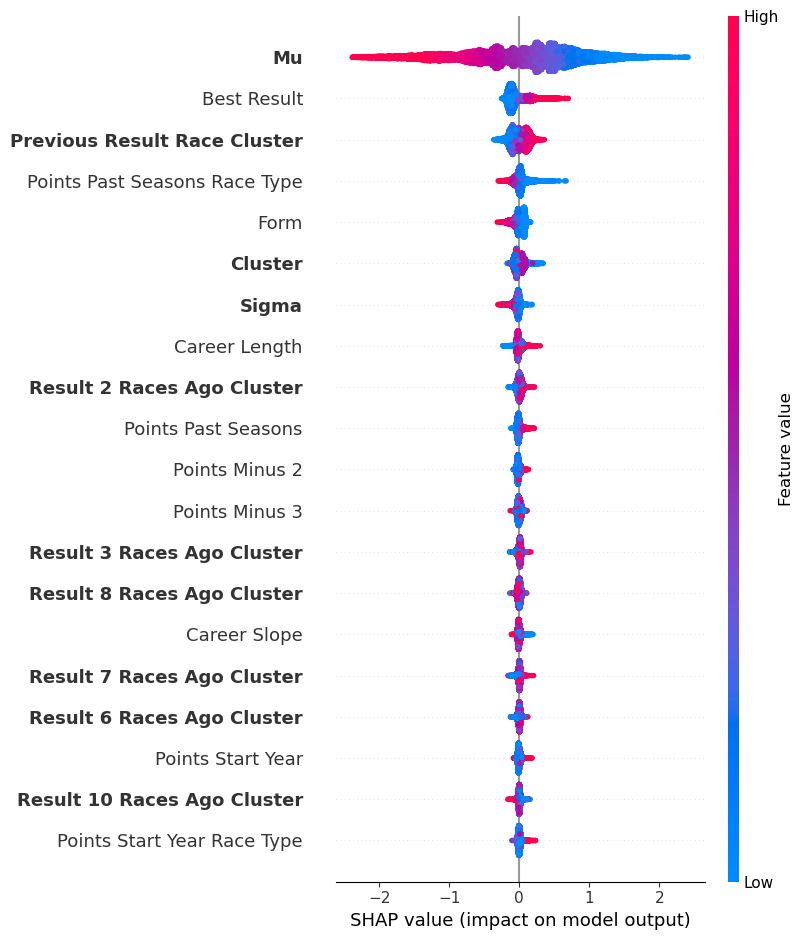

In [57]:
import shap
import matplotlib.pyplot as plt

pred = model_sel.predict(test_sel_copy.loc[:,save_columns], output_margin=True)
explainer = shap.TreeExplainer(model_sel)
shap_values = explainer.shap_values(test_sel_copy.loc[:,save_columns])

names_vis = ['Age', 'Career Length', 'Form', 'Best Result','Time Since Best Result', 'Stage Race', 'Points Past Seasons',
       'Points Minus 1', 'Points Minus 2', 'Points Minus 3', 'Career Slope',
       'Points Start Year', 'Points Start Year Race Type', 'Points Past Seasons Race Type', 'Previous Result Race Cluster', 'Result 2 Races Ago Cluster',
        'Result 3 Races Ago Cluster',  'Result 4 Races Ago Cluster', 'Result 5 Races Ago Cluster', 'Result 6 Races Ago Cluster',
            'Result 7 Races Ago Cluster', 'Result 8 Races Ago Cluster', 'Result 9 Races Ago Cluster', 'Result 10 Races Ago Cluster',
                              'Mu',                     'Sigma', 'Cluster']

shap.summary_plot(shap_values, test_sel_copy.loc[:,save_columns], feature_names = names_vis, show = False)
ax = plt.gcf()

for lab in ax.axes[0].get_yticklabels():
   if lab.get_text() == "Mu":
      lab.set_fontweight('bold')
   if lab.get_text() == "Sigma":
      lab.set_fontweight('bold')  
   if lab.get_text() == "Cluster":
      lab.set_fontweight('bold')      
   if 'Cluster' in lab.get_text():
      lab.set_fontweight('bold')  

# Ensemble

In [58]:
test_sel_copy['PredictionsLAMBDAMART_SEL'] = model_sel.predict(test_sel_copy.loc[:,save_columns])
test_sel_copy['PredictionsLAMBDAMART_KHOLKINE'] = kholkine_model.predict(test_sel_copy.loc[:,['Age', 'CareerLength', 'form', 'best_result','time_since_best_result', 'PointsPastSeasons',
   'pointsMinus1', 'pointsMinus2', 'pointsMinus3', 'CareerSlope',
   'PointsStartYear', 'PointsStartYearRaceType',
   'PointsPastSeasonsRaceType']])
test_sel_copy['Ensemble'] = test_sel_copy['PredictionsLAMBDAMART_KHOLKINE']+test_sel_copy['PredictionsLAMBDAMART_SEL']
lambdas_per_query = test_sel_copy[-test_sel_copy['RaceName'].str.contains('Giovani')].sort_values(['RaceName', 'Ensemble'], ascending=[True, True], kind='stable')
lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
gain_calculation = np.abs(gain_calculation-10)

gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
lambdas_per_query['gain'] = gain_calculation
top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

In [59]:
top_10_correct

3.2857142857142856

In [60]:
dcg

10.149555724590085

In [61]:
dcg/idcg

0.33870115203390666

In [62]:
top10s_sample_ensemble = lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum()
dcg_sample_ensemble = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum()

In [63]:
import scipy.stats as stats
stats.ttest_rel(dcg_sample_ensemble, dcg_sample_kholkine) 

Ttest_relResult(statistic=4.04888338782783, pvalue=8.964145064620066e-05)

In [64]:
stats.ttest_rel(top10s_sample_ensemble, top10s_sample_kholkine) 

Ttest_relResult(statistic=4.011398014555574, pvalue=0.00010321975645728042)

In [65]:
import dill

dill.dump_session('./global_save_first_submission_v4.pkl')

In [66]:
len(train_sel_small_copy['RaceName'].unique())

482

In [67]:
len(val_sel_copy['RaceName'].unique())

135

In [68]:
len(lambdas_per_query['RaceName'].unique())

126

In [75]:
0.3387/0.2944

1.150475543478261

# Six Races Kholkine

In [1]:
import dill

#dill.load_session('./global_save_first_submission_v4.pkl')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
test_sel_copy.columns

Index([                           'Age',                   'CareerLength',
                                 'form',                    'best_result',
               'time_since_best_result',                      'StageRace',
                    'PointsPastSeasons',                   'pointsMinus1',
                         'pointsMinus2',                   'pointsMinus3',
                          'CareerSlope',                'PointsStartYear',
              'PointsStartYearRaceType',      'PointsPastSeasonsRaceType',
                                      0,                                1,
                                      2,                                3,
                                      4,                                5,
                                      6,                                7,
                                      8,                                9,
                                   'Mu',                          'Sigma',
                         

In [4]:
lambdas_per_query = test_sel_copy[test_sel_copy['RaceName'].str.contains('Liege |Fleche|E3|Wevelgem|Roubaix|Vlaanderen')].sort_values(['RaceName', 'Mu'], ascending=[True, False], kind='stable')

lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
gain_calculation = np.abs(gain_calculation-10)

gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
lambdas_per_query['gain'] = gain_calculation
top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

top10s_small_sample_direct = lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum()
dcg_small_sample_direct = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum()

print(len(lambdas_per_query['RaceName'].unique()))

print(top_10_correct)
print(dcg)
print(dcg/idcg)

6
4.0
13.58404715845329
0.45331367664734556


In [87]:
lambdas_per_query = test_sel_copy[test_sel_copy['RaceName'].str.contains('Liege |Fleche|E3|Wevelgem|Roubaix|Vlaanderen')].sort_values(['RaceName', 'Ensemble'], ascending=[True, True], kind='stable')

lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
gain_calculation = np.abs(gain_calculation-10)

gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
lambdas_per_query['gain'] = gain_calculation
top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

top10s_small_sample_ensemble = lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum()
dcg_small_sample_ensemble = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum()

print(len(lambdas_per_query['RaceName'].unique()))

print(top_10_correct)
print(dcg)
print(dcg/idcg)

6
5.333333333333333
18.14313892587622
0.6054552753296673


In [88]:
top10s_small_sample_ensemble

RaceName
2022 E3 Saxo Bank Classic                        5
2022 Gent-Wevelgem in Flanders Fields            5
2022 La Fleche Wallonne                          7
2022 Liege - Bastogne - Liege                    4
2022 Paris-Roubaix                               5
2022 Ronde van Vlaanderen - Tour des Flandres    6
Name: top_10_correct, dtype: int32

In [85]:
lambdas_per_query = test_sel_copy[test_sel_copy['RaceName'].str.contains('Liege |Fleche|E3|Wevelgem|Roubaix|Vlaanderen')].sort_values(['RaceName', 'PredictionsLAMBDAMART_KHOLKINE'], ascending=[True, True], kind='stable')

lambdas_per_query['display_rank'] = lambdas_per_query.groupby('RaceName').cumcount()

lambdas_per_query['discount'] = 1 / np.log2(2 + lambdas_per_query['display_rank'])
gain_calculation = np.where(lambdas_per_query['Pos.']>10,10,lambdas_per_query['Pos.'])
gain_calculation = np.abs(gain_calculation-10)

gain_calculation = np.where(lambdas_per_query['display_rank']>=10,0,gain_calculation)
lambdas_per_query['top_10_correct'] = np.where((lambdas_per_query['display_rank']<10)&(lambdas_per_query['Pos.']<10),1,0)
lambdas_per_query['gain'] = gain_calculation
top_10_correct = np.mean(lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum())

lambdas_per_query['discounted_gain'] = lambdas_per_query['gain'] * lambdas_per_query['discount'] 
dcg = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum().mean()

print(len(lambdas_per_query['RaceName'].unique()))

print(top_10_correct)
print(dcg)
print(dcg/idcg)

top10s_small_sample_kholkine = lambdas_per_query.groupby(['RaceName'])['top_10_correct'].sum()
dcg_small_sample_kholkine = lambdas_per_query[lambdas_per_query['display_rank'] < 10].groupby('RaceName')['discounted_gain'].sum()


6
5.0
17.774207850063124
0.593143664477947


In [86]:
top10s_small_sample_kholkine

RaceName
2022 E3 Saxo Bank Classic                        7
2022 Gent-Wevelgem in Flanders Fields            4
2022 La Fleche Wallonne                          6
2022 Liege - Bastogne - Liege                    3
2022 Paris-Roubaix                               4
2022 Ronde van Vlaanderen - Tour des Flandres    6
Name: top_10_correct, dtype: int32

In [89]:
stats.ttest_rel(top10s_small_sample_ensemble, top10s_small_sample_kholkine) 

Ttest_relResult(statistic=0.6741998624632419, pvalue=0.5300916186704535)

In [90]:
stats.ttest_rel(dcg_small_sample_ensemble, dcg_small_sample_kholkine) 

Ttest_relResult(statistic=0.4347961482110361, pvalue=0.6818361193271946)

# END